### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'base_SNL_MSU_DOE_avg'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
{'project': 'SNL_MSU_DOE_avg', 'model': 'MLP', 'loss': 'rmse', 'split_by': 'random', 'bayes_opt': False, 'patience': 500, 'epoch': 2000, 'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024, 'static_params': {'patience': 500, 'epoch': 2000}, 'chosen_params': {'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}, 'layers': [16, 64, 128, 128, 64, 16], 'n_calls': 200, 'sequence': True, 'SPACEs': {'lr': {'low': 0.001, 'high': 0.05, 'prior': 'log-uniform'}, 'weight_decay': {'low': 1e-05, 'high': 0.05, 'prior': 'log-uniform'}, 'batch_size': {'categories': [32, 64, 128, 256, 512, 1024, 2048, 4096]}}, 'feature_names_type': {'Percentage of Fibre in 0-deg Direction': 1, 'Percentage of Fibre in 45-deg Direction': 1, 'Percentage of Fibre in 90-deg Direction': 1, 'Percentage of Fibre in Other Direction': 1, 'Absolute Maximum Stress': 0, 'Absolute Peak-to-peak Stress': 0, 'Frequency': 0, 'Fibre Volumn Fraction': 1, 'Relative Maximum Stress': 0, 'Relative Peak-to-peak Stress': 0

### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 5.1433, Val loss: 3.9067, Min val loss: 3.9067
Epoch: 100/2000, Train loss: 0.6084, Val loss: 0.7654, Min val loss: 0.7619
Epoch: 200/2000, Train loss: 0.5354, Val loss: 0.7028, Min val loss: 0.7008
Epoch: 300/2000, Train loss: 0.4978, Val loss: 0.6812, Min val loss: 0.6790
Epoch: 400/2000, Train loss: 0.4740, Val loss: 0.6699, Min val loss: 0.6685
Epoch: 500/2000, Train loss: 0.4553, Val loss: 0.6602, Min val loss: 0.6586
Epoch: 600/2000, Train loss: 0.4417, Val loss: 0.6545, Min val loss: 0.6512
Epoch: 700/2000, Train loss: 0.4258, Val loss: 0.6512, Min val loss: 0.6481
Epoch: 800/2000, Train loss: 0.4130, Val loss: 0.6457, Min val loss: 0.6437
Epoch: 900/2000, Train loss: 0.4027, Val loss: 0.6402, Min val loss: 0.6380
Epoch: 1000/2000, Train loss: 0.3919, Val loss: 0.6394, Min val loss: 0.6353
Epoch: 1100/2000, Train loss: 0.3834, Val loss: 0.6364, Min val loss: 0.6335
Epoch: 1200/2000, Train loss: 0.3759, Val loss: 0.6397, Min val loss: 0.6335
Epoch: 1300

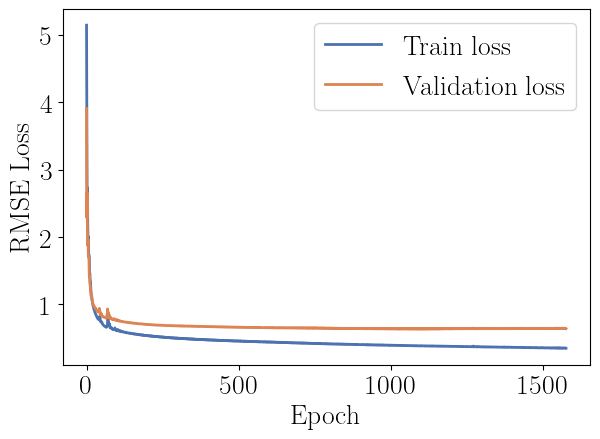

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.3886, R2: 0.9117
Validation Loss: 0.6335, R2: 0.7554
Test Loss: 0.6513, R2: 0.6947


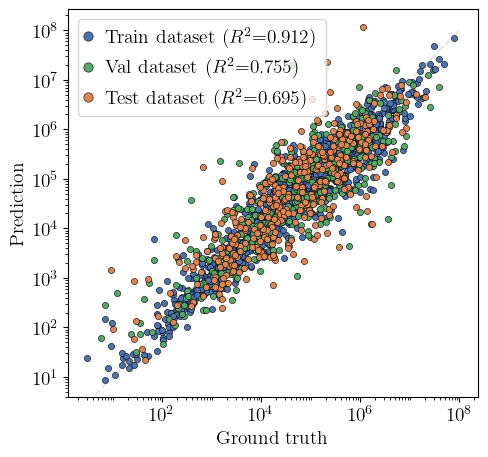

In [4]:
trainer.plot_truth_pred()

Dataset size: 2371 790 792
Train Loss: 0.6021, R2: 0.7787
Validation Loss: 0.5808, R2: 0.7809
Test Loss: 0.5601, R2: 0.8154


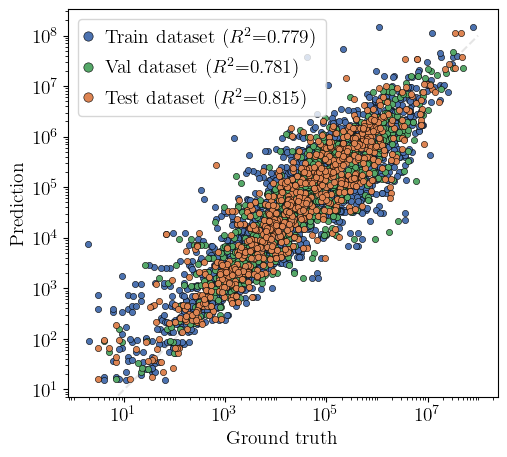

In [5]:
trainer.load_data(data_path='../data/SNL_MSU_DOE_fatigue.xlsx')
trainer.plot_truth_pred()

Train Loss: 0.2373, R2: 0.9656
Train Loss: 0.5225, R2: 0.8227
Test Loss: 0.4940, R2: 0.8564


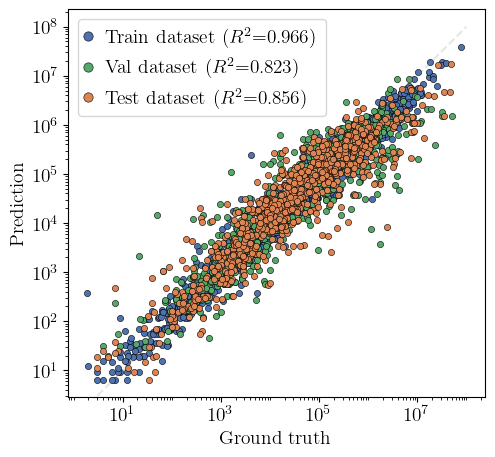

In [6]:
trainer.plot_truth_pred_sklearn(model_name='rf')

In [7]:
trainer.plot_truth_pred_sklearn(model_name='tabnet')

/home/xlluo/hdd/ML-fracture/venv/lib/python3.6/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.67644 | val_0_rmse: 30.59113|  0:00:00s
epoch 100| loss: 0.69085 | val_0_rmse: 0.90279 |  0:00:05s
epoch 200| loss: 0.60755 | val_0_rmse: 0.67991 |  0:00:10s
epoch 300| loss: 0.54657 | val_0_rmse: 0.60889 |  0:00:16s
epoch 400| loss: 0.52402 | val_0_rmse: 0.61823 |  0:00:22s
epoch 500| loss: 0.49916 | val_0_rmse: 0.60831 |  0:00:28s
epoch 600| loss: 0.47953 | val_0_rmse: 0.58139 |  0:00:33s


KeyboardInterrupt: 

### Permutation feature importance

In [ ]:
trainer.plot_feature_importance()

### Partial dependence

In [ ]:
trainer.plot_partial_dependence()

In [ ]:
trainer.plot_partial_err()